In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [26]:
df = pd.read_csv("BikeSharingAssignment.csv")

In [27]:
print(df.head(20))

               datetime  season  holiday  workingday  weather   temp   atemp  \
0   2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1   2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2   2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3   2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4   2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5   2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6   2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7   2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8   2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9   2011-01-01 09:00:00       1        0           0        1  13.12  17.425   
10  2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
11  2011-01-01 11:00:00       1        0

In [28]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [29]:
print(df.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [30]:
df['datetime'] = pd.to_datetime(df['datetime'])
#the perpose is to change the type of datatime objects well

In [31]:
print(df.isnull().sum()) # to check for any missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [32]:
print(df.duplicated().sum()) # checking duplicates

0


In [33]:
#the dataset has no nulls, and no duplicaes

In [34]:
#we need to rewrite the nonnumerical values as numerical ones

In [35]:
#there is no nonnumerical vales
#the process of categorical columns replacing can be skipped
#seems that the dataset is given ready!!!

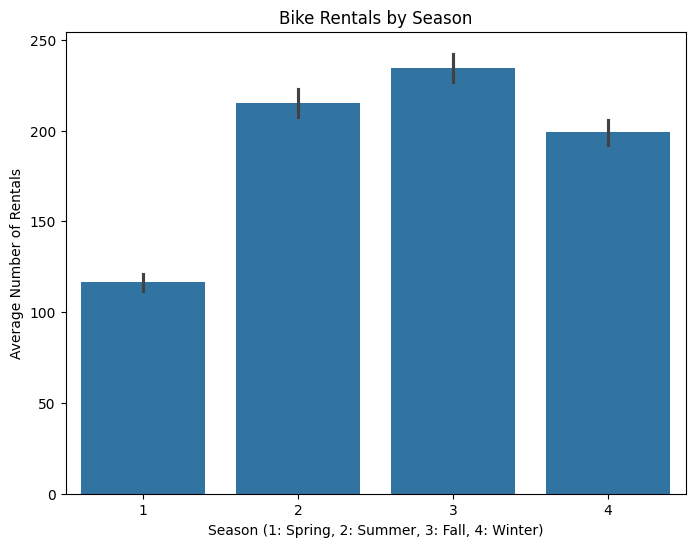

In [43]:
#Bike Rentals by Season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='count', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Number of Rentals')
plt.show()

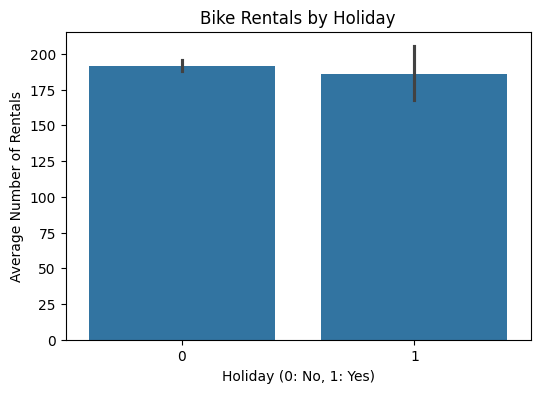

In [44]:
#Bike Rentals by Holiday
plt.figure(figsize=(6, 4))
sns.barplot(x='holiday', y='count', data=df)
plt.title('Bike Rentals by Holiday')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Number of Rentals')
plt.show()

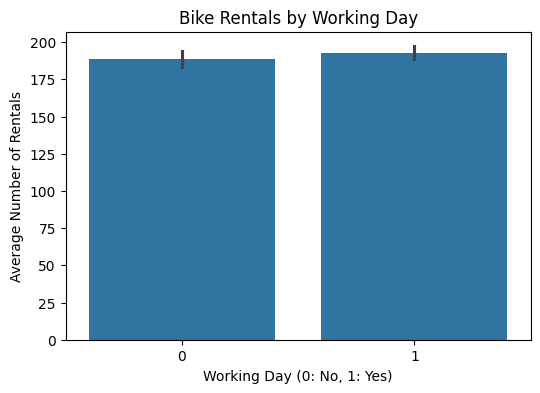

In [45]:
#by Working Day
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='count', data=df)
plt.title('Bike Rentals by Working Day')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Average Number of Rentals')
plt.show()

In [46]:
#note: the data of working VS holiday days are in inverse

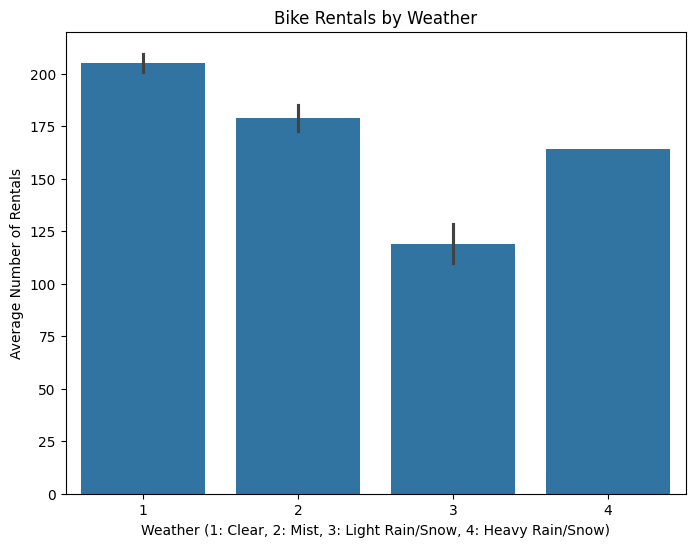

In [47]:
#Bike Rentals by Weather
plt.figure(figsize=(8, 6))
sns.barplot(x='weather', y='count', data=df)
plt.title('Bike Rentals by Weather')
plt.xlabel('Weather (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)')
plt.ylabel('Average Number of Rentals')
plt.show()

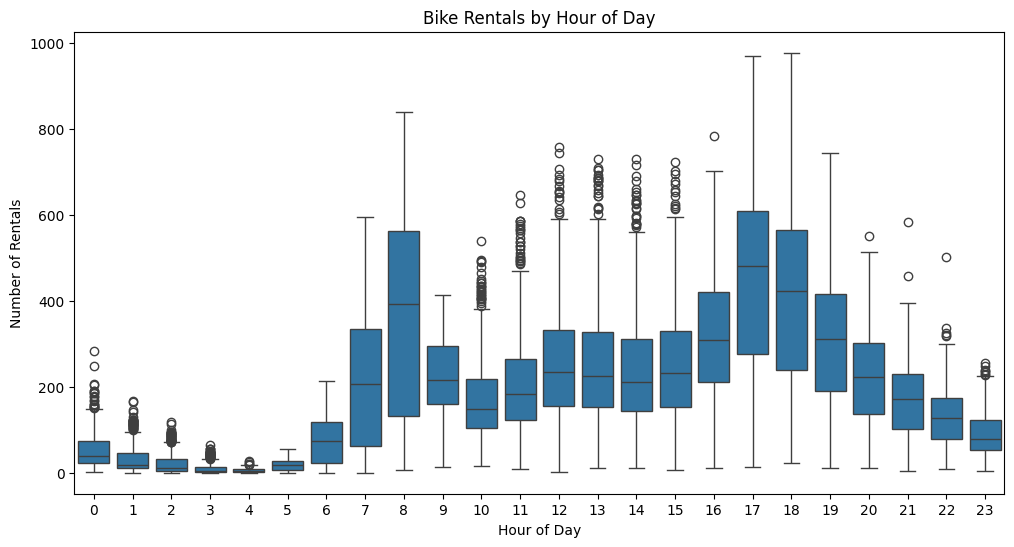

In [51]:
#Bike Rentals by Hour of Day
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='count', data=df)
plt.title('Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.show()

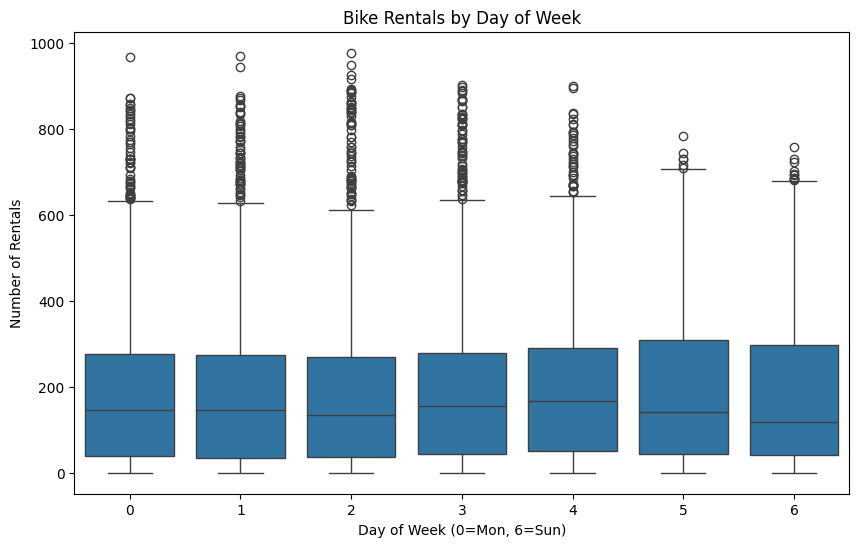

In [52]:
#Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='count', data=df)
plt.title('Bike Rentals by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Number of Rentals')
plt.show()

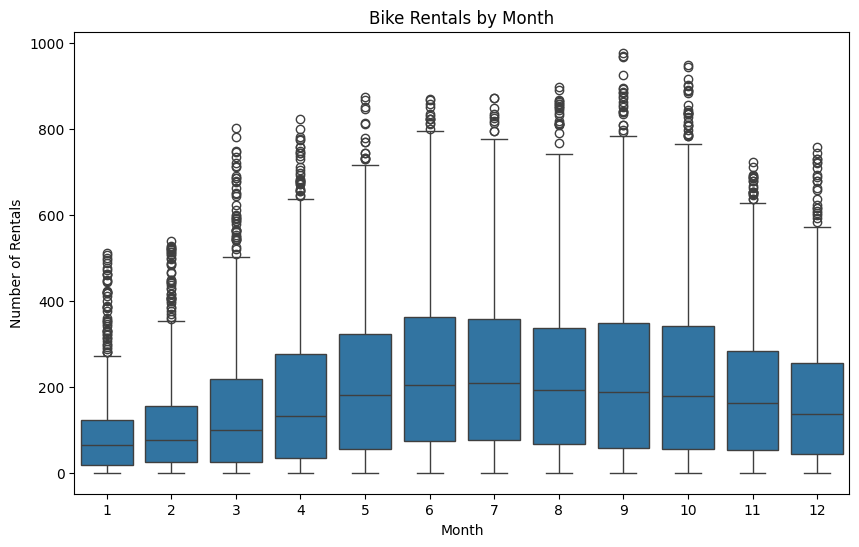

In [53]:
#by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='count', data=df)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

done for the process of analyzing the target variable (which is count)

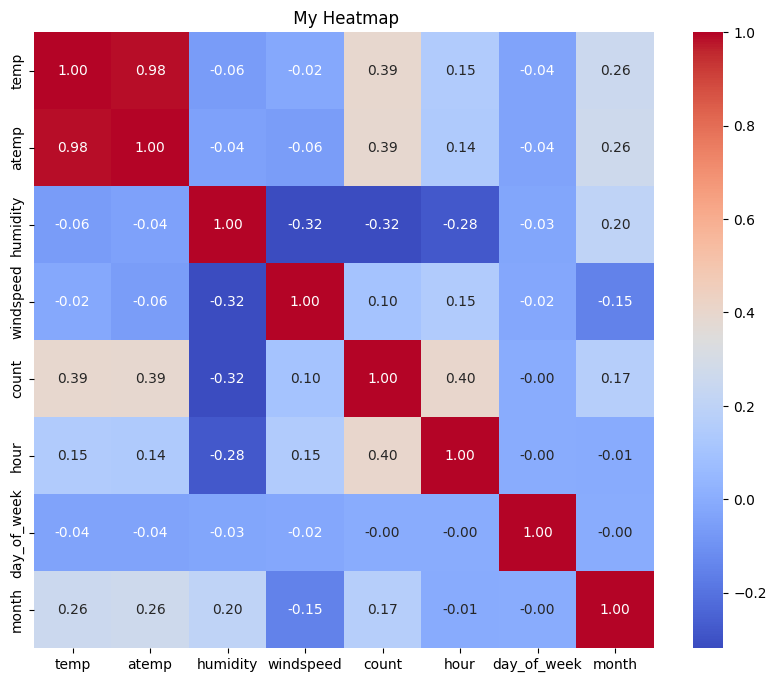

In [54]:
#Creating a correlation heatmap to identify features strongly correlated with the target variable.
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count', 'hour', 'day_of_week', 'month']  # Include target and engineered time features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #fmt=".2f" to show 2 decimal places
plt.title(' My Heatmap')
plt.show()

Values close to +1: Strong positive correlation (as one variable increases, the other tends to increase).

Values close to -1: Strong negative correlation (as one variable increases, the other tends to decrease).

Values close to 0: Weak or no linear correlation.

In [56]:
#about creating a new feature, the feature I will give is the day of year, which expresses cycling in an event or anniversary
#to build this feature, we need to work on another supporting features (like casual and register for count)

In [59]:
df['day_of_year'] = df['datetime'].dt.dayofyear #the new feature

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [60]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day_of_week,month,year,day_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,5,1,2011,1,0.000000,1.000000,-0.974928,-0.222521,0.5,0.866025
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,5,1,2011,1,0.258819,0.965926,-0.974928,-0.222521,0.5,0.866025
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,5,1,2011,1,0.500000,0.866025,-0.974928,-0.222521,0.5,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,5,1,2011,1,0.707107,0.707107,-0.974928,-0.222521,0.5,0.866025
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,5,1,2011,1,0.866025,0.500000,-0.974928,-0.222521,0.5,0.866025


Why 'day_of_year' and Cyclical Features?

'day_of_year': Captures yearly seasonality. For example, bike rentals might be higher during certain periods of the year (e.g., spring and fall) regardless of the specific month.

Cyclical Features: Addresses the "wrap-around" effect of time. Without these transformations, a model might interpret the difference between 23:00 and 00:00 as a large difference, when in reality, they are consecutive hours.

next, we make the linear regression model

In [79]:
X = df.drop(['datetime','casual', 'registered', 'count'], axis=1)  # Features
y = df['count']  # Target variable
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(y_test.dtypes)

int64


In [87]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'year', 'day_of_year', 
                 'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 
                 'month_sin', 'month_cos'] 

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) 
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

now we build and train the model

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set


In [91]:
y_pred = model.predict(X_test)


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [97]:
mae

np.float64(91.67414109501664)

In [98]:
rmse

np.float64(125.58683952731776)

In [99]:
r2

0.5221593931968941

plotting residuals

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

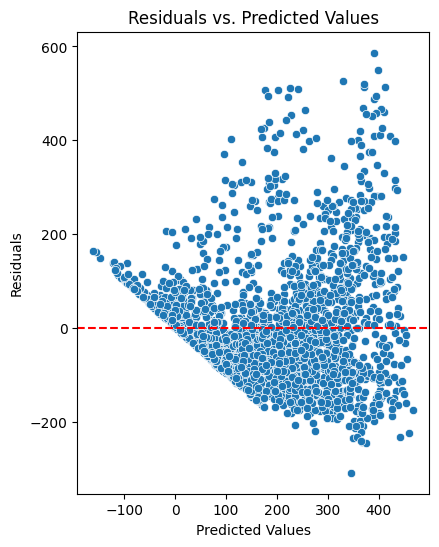

In [101]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

Text(0.5, 1.0, 'Distribution of Residuals')

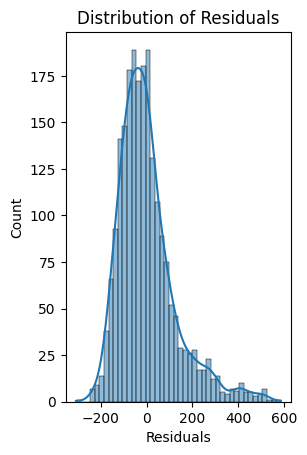

In [102]:
plt.subplot(1, 2, 2)  # This is the second plot in the grid
sns.histplot(residuals, kde=True) # or sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")

In [104]:
plt.tight_layout() 
plt.show()

<Figure size 640x480 with 0 Axes>

here is the code gathered

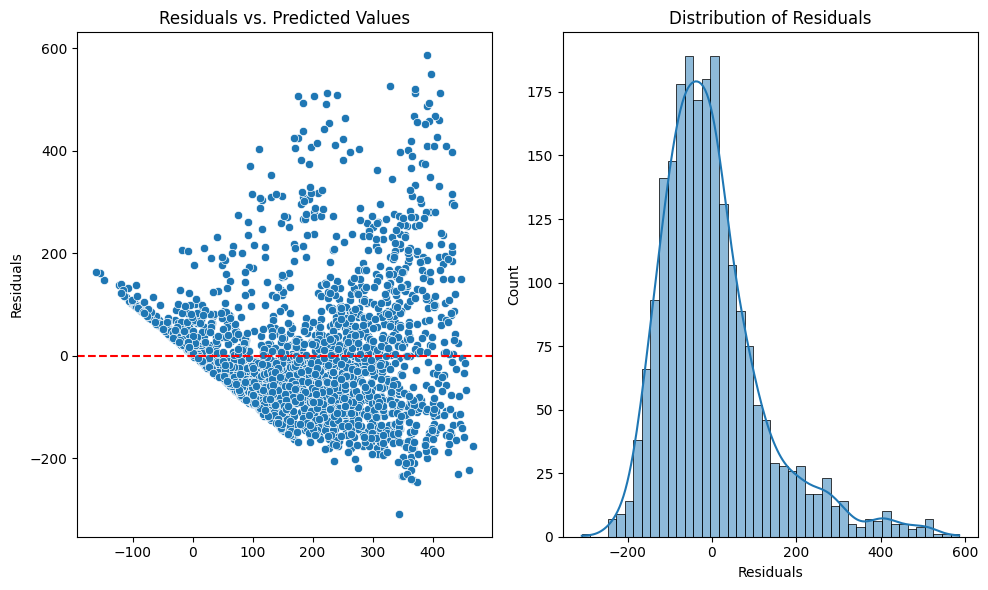

In [106]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

plt.subplot(1, 2, 2)  
sns.histplot(residuals, kde=True) 
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")

plt.tight_layout()
plt.show()

bonus tasks 

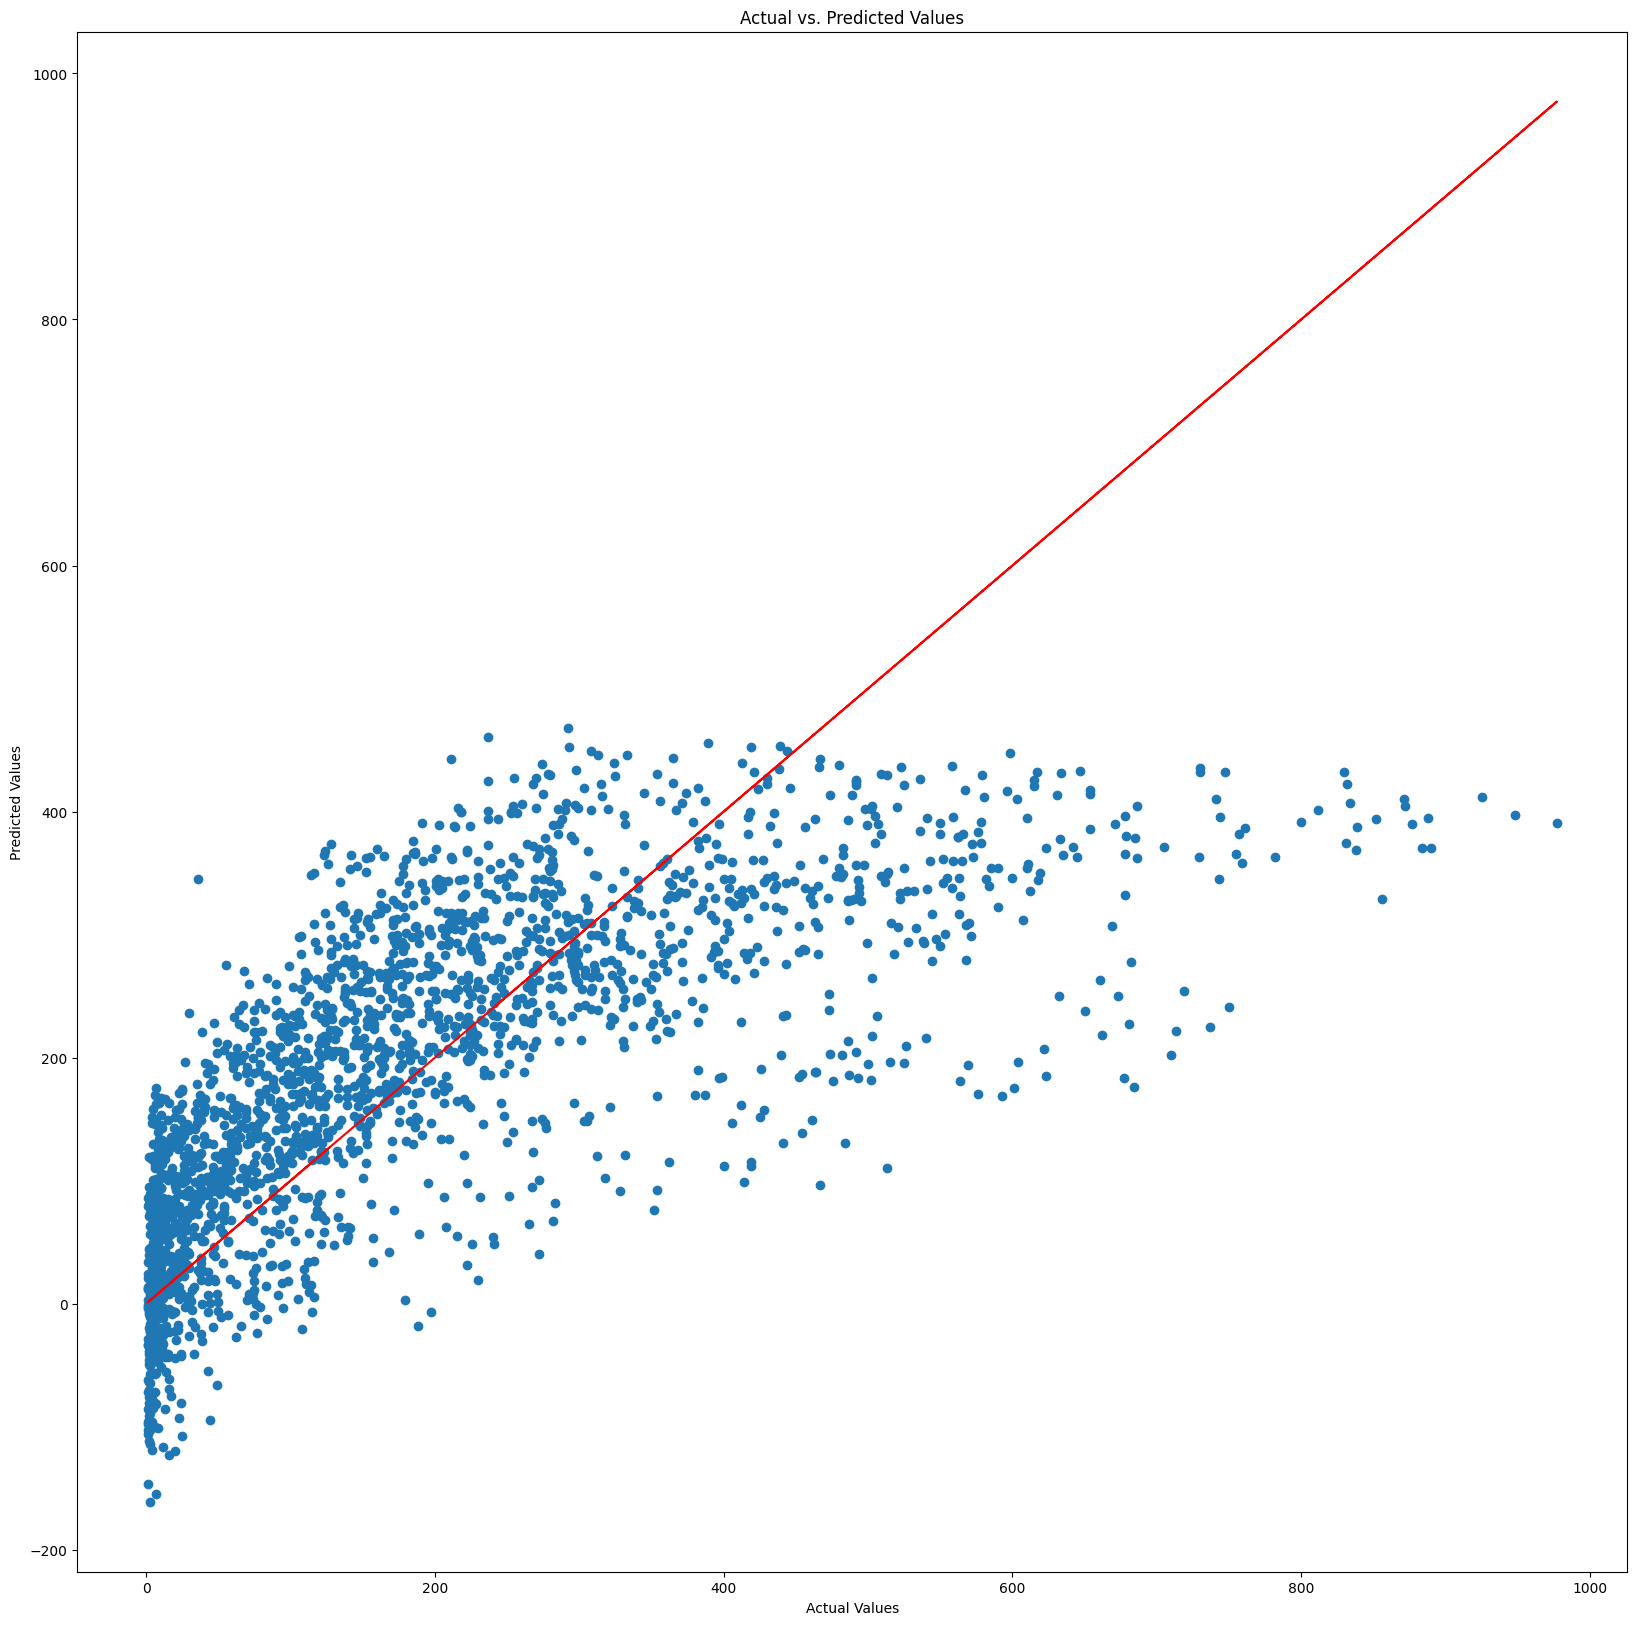

In [112]:
plt.figure(figsize=(20, 20))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='-') # Add a diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [113]:
#it's noticable that NO predicted value can pass 600, while actual values can

# end on the assignment 👍 

islam ouda
islamouda85@gmail.com

About this experience

This project predicted bike-sharing demand using historical data and weather information. We used linear regression, a supervised learning method. First, we loaded and cleaned the data, created new features like hour, day of week, and cyclical time components, and one-hot encoded categorical variables. Then, we explored the data, looking at distributions, time trends, and correlations. We split the data into training and testing sets and trained the linear regression model. We evaluated the model using MAE, RMSE, and R-squared, and plotted residuals to check for any issues with the model's assumptions. Finally, we visualized actual versus predicted values. Based on our analysis, we observed [insert key observation, e.g., strong daily and weekly seasonality]. The model achieved [mention R-squared and any other important metric]. The residual plots showed [mention any pattern in residuals]. Future work could involve creating more features, trying different models, or fine-tuning model settings.

thank you ☺ 